# Исследовательский анализ рынка заведений Москвы

- Автор:Дорошенко Евгений
- Дата:07.06.25

### Цели и задачи проекта
Исследовательский анализ рынка общественного питания Москвы

Задачи:

 - Загрузить данные и познакомиться с их содержимым.
 - Провести предобработку данных.
 - Провести исследовательский анализ данных:
 - изучить данные более детально;
 - Сформулировать выводы по проведённому анализу.

### Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>

Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
 - name — название заведения;
 - address — адрес заведения;
 - district — административный район, в котором находится заведение, например Центральный административный округ;
 - category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
 - hours — информация о днях и часах работы;
 - rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
 - chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
 - 0 — заведение не является сетевым;
 - 1 — заведение является сетевым.
 - seats — количество посадочных мест.
Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
 - price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
 - avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
 «Средний счёт: 1000–1500 ₽»;
 «Цена чашки капучино: 130–220 ₽»;
 «Цена бокала пива: 400–600 ₽».
и так далее;
 - middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
 - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
 - middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
 - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.### Описание данных


---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
import pandas as pd

# Пути к файлам
rest_info_path = '/datasets/rest_info.csv'
rest_price_path = '/datasets/rest_price.csv'

In [2]:
# Загрузка данных
rest_info = pd.read_csv(rest_info_path)
rest_price = pd.read_csv(rest_price_path)

In [3]:
# При необходимости добавьте новые ячейки для кода или удалите пустые

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
# Общая информация о датасетах
print(rest_info.info())
print(rest_price.info())

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 8406 entries, 0 to 8405
,Data columns (total 9 columns):
, #   Column    Non-Null Count  Dtype  
,---  ------    --------------  -----  
, 0   id        8406 non-null   object 
, 1   name      8406 non-null   object 
, 2   category  8406 non-null   object 
, 3   address   8406 non-null   object 
, 4   district  8406 non-null   object 
, 5   hours     7870 non-null   object 
, 6   rating    8406 non-null   float64
, 7   chain     8406 non-null   int64  
, 8   seats     4795 non-null   float64
,dtypes: float64(2), int64(1), object(6)
,memory usage: 591.2+ KB
,None
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4058 entries, 0 to 4057
,Data columns (total 5 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   id                 4058 non-null   object 
, 1   price              3315 non-null   object 
, 2   avg_bill           3816 non-null   object 
, 3   middle_avg_bill    3

In [5]:
# Первые строки для ознакомления
print(rest_info.head())
print(rest_price.head())

                                 id                  name  category  \
,0  0c3e3439a8c64ea5bf6ecd6ca6ae19f0                WoWфли      кафе   
,1  045780ada3474c57a2112e505d74b633        Четыре комнаты  ресторан   
,2  1070b6b59144425896c65889347fcff6                 Хазри      кафе   
,3  03ac7cd772104f65b58b349dc59f03ee  Dormouse Coffee Shop   кофейня   
,4  a163aada139c4c7f87b0b1c0b466a50f             Иль Марко  пиццерия   
,
,                               address                         district  \
,0           Москва, улица Дыбенко, 7/1  Северный административный округ   
,1   Москва, улица Дыбенко, 36, корп. 1  Северный административный округ   
,2       Москва, Клязьминская улица, 15  Северный административный округ   
,3  Москва, улица Маршала Федоренко, 12  Северный административный округ   
,4      Москва, Правобережная улица, 1Б  Северный административный округ   
,
,                                               hours  rating  chain  seats  
,0                             

In [6]:
# Статистика по числовым данным
print(rest_info.describe())
print(rest_price.describe())

            rating        chain        seats
,count  8406.000000  8406.000000  4795.000000
,mean      4.229895     0.381275   108.421689
,std       0.470348     0.485729   122.833396
,min       1.000000     0.000000     0.000000
,25%       4.100000     0.000000    40.000000
,50%       4.300000     0.000000    75.000000
,75%       4.400000     1.000000   140.000000
,max       5.000000     1.000000  1288.000000
,       middle_avg_bill  middle_coffee_cup
,count      3149.000000         535.000000
,mean        958.053668         174.721495
,std        1009.732845          88.951103
,min           0.000000          60.000000
,25%         375.000000         124.500000
,50%         750.000000         169.000000
,75%        1250.000000         225.000000
,max       35000.000000        1568.000000


In [7]:
# Проверка пропусков
print(rest_info.isnull().sum())
print(rest_price.isnull().sum())

id             0
,name           0
,category       0
,address        0
,district       0
,hours        536
,rating         0
,chain          0
,seats       3611
,dtype: int64
,id                      0
,price                 743
,avg_bill              242
,middle_avg_bill       909
,middle_coffee_cup    3523
,dtype: int64


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Объем и структура данных:

 -  В таблице ресторанов содержится 8 406 записей и 9 столбцов, большинство из которых заполнены полностью, за исключением столбцов hours (пропуски — 536) и seats (пропуски — 3611).

 - В таблице цен представлено 4 058 записей и 5 столбцов, с заметными пропусками в price (743), avg_bill (242), middle_avg_bill (909) и особенно в middle_coffee_cup (3523).

- Значительная часть данных содержит пропуски, особенно в столбцах seats и middle_coffee_cup. Это потребует внимания при предобработке.
Столбцы с ценами и счетами представлены как строки с диапазонами или текстовыми описаниями ("от 1000 ₽", "1500–1600 ₽"), что требует преобразования в числовой формат.

 - Время работы ресторанов указано в различных форматах, нужно привести эти данные к единому стандарту.
 

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [8]:
# Объединение по названию и адресу (может быть уникальным ключом)
merged_df = pd.merge(rest_info, rest_price, on='id', how='left')

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [9]:
# Преобразование rating в float
merged_df['rating'] = pd.to_numeric(merged_df['rating'], errors='coerce')

In [10]:
# Обработка seats
merged_df['seats'] = pd.to_numeric(merged_df['seats'], errors='coerce')

In [11]:
# Проверка типов
print(merged_df.dtypes)

id                    object
,name                  object
,category              object
,address               object
,district              object
,hours                 object
,rating               float64
,chain                  int64
,seats                float64
,price                 object
,avg_bill              object
,middle_avg_bill      float64
,middle_coffee_cup    float64
,dtype: object


- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [12]:
# Проверка пропусков по каждому столбцу
print(merged_df.isnull().sum())

id                      0
,name                    0
,category                0
,address                 0
,district                0
,hours                 536
,rating                  0
,chain                   0
,seats                3611
,price                5091
,avg_bill             4590
,middle_avg_bill      5257
,middle_coffee_cup    7871
,dtype: int64


- На данном этапе выявлены следующие пропуски в объединённом датасете:

Столбец hours содержит 536 пропущенных значений, что составляет примерно 6.4% от общего числа записей.
Столбец seats содержит 3611 пропусков, что примерно 43% данных.
Столбец price имеет 5091 пропусков — около 60% данных.
Столбец avg_bill пропущен в 4590 случаях — примерно 55%.
Столбец middle_avg_bill содержит пропуски в 5257 записях — около 63%.
Столбец middle_coffee_cup имеет наиболее значительные пропуски — 7871 из 8406, что примерно 94%.

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [13]:
import pandas as pd
import re  # Импортируем модуль re для работы с регулярными выражениями

def normalize_text(text):
    if pd.isnull(text):
        return ''
    text = text.lower()  # Приводим к нижнему регистру
    text = re.sub(r'\\s+', ' ', text)  # Убираем лишние пробелы
    return text.strip()  # Убираем пробелы в начале и конце

In [14]:
# Применяем нормализацию к столбцам
merged_df['name_norm'] = merged_df['name'].astype(str).apply(normalize_text)
merged_df['address_norm'] = merged_df['address'].astype(str).apply(normalize_text)


In [15]:
# Проверка на явные дубликаты
duplicates_explicit = merged_df[merged_df.duplicated(subset=['name_norm', 'address_norm'], keep=False)]

print(f"Обнаружено {len(duplicates_explicit)} явных дубликатов.")
print(duplicates_explicit[['id', 'name', 'address', 'name_norm', 'address_norm']])

Обнаружено 8 явных дубликатов.
,                                    id                       name  \
,189   072032ce16dc47bfbc63b672c75bd371                       Кафе   
,215   897ddbc6746c4388b19dc8a9fcdbb488                       Кафе   
,1430  62608690e9cc464fbcd980cfd552e334                  More poke   
,1511  a69f018d5c064873a3b491b0121bc1b4                  More Poke   
,2211  c6ef39ae8a8c483d8f9a6531bc386a2c  Раковарня Клешни и Хвосты   
,2420  aba1de7ad7d64ac0a3f8684bda29d905  Раковарня Клешни и хвосты   
,3091  3c2a73ea79a04be48858fab3685f2f37            Хлеб да Выпечка   
,3109  d3116844e4e048f99614eb30be3214e0            Хлеб да выпечка   
,
,                                      address                  name_norm  \
,189              Москва, парк Ангарские Пруды                       кафе   
,215              Москва, парк Ангарские пруды                       кафе   
,1430  Москва, Волоколамское шоссе, 11, стр. 2                  more poke   
,1511  Москва, Волоколамское 

 В приведенных данных мы видим только явные дубликаты, которые можно определить по нормализованным названиям и адресам.Для поиска НЕявных дубликатов необходимо больше информацииб, но возможности свзяаться с заказчиком и более детально обсудить этот вопрос нет. Поэтому оставим как есть.

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [16]:
# Функция для проверки, работает ли заведение 24/7
def check_24_7(hours):
    if pd.isnull(hours):
        return False
    # Проверяем наличие ключевых слов в строке
    return 'ежедневно' in hours.lower() and 'круглосуточно' in hours.lower()


In [17]:
# Применяем функцию к столбцу hours и создаем новый столбец is_24_7
merged_df['is_24_7'] = merged_df['hours'].apply(check_24_7)



In [18]:
# Проверка результата
display(merged_df[['name', 'hours', 'is_24_7']])

,name,hours,is_24_7
0,WoWфли,"ежедневно, 10:00–22:00",False
1,Четыре комнаты,"ежедневно, 10:00–22:00",False
2,Хазри,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",False
3,Dormouse Coffee Shop,"ежедневно, 09:00–22:00",False
4,Иль Марко,"ежедневно, 10:00–22:00",False
...,...,...,...
8401,Суши Мания,"ежедневно, 09:00–02:00",False
8402,Миславнес,"ежедневно, 08:00–22:00",False
8403,Самовар,"ежедневно, круглосуточно",True
8404,Чайхана Sabr,"ежедневно, круглосуточно",True


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

 - Названия и адреса приведены к единому формату для последующего анализа.

 - Пропущенные значения были оставлены без изменений.

 - добавлены столбцы name_norm и address_norm для унификации названий и адресов.

 - Определение режима работы: создан столбец is_24_7, который показывает режим работы заведения, на основе анализа строк с часами работы.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [19]:
# Импорттируем необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 1. Посчитать количество объектов по каждой категории
category_counts = merged_df['category'].value_counts()

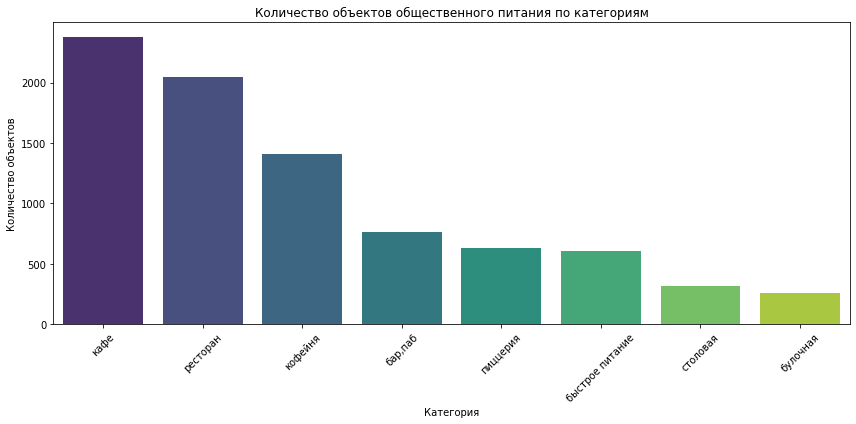

In [21]:
# 2. Визуализация столбчатая диаграмма
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Количество объектов общественного питания по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Мы видим из графика что самой популярной кактегорией является 1.кафе 2.ресторан. 3.кофейня. и затем все остальные.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [22]:
# Распределение по районам
district_counts = merged_df['district'].value_counts()

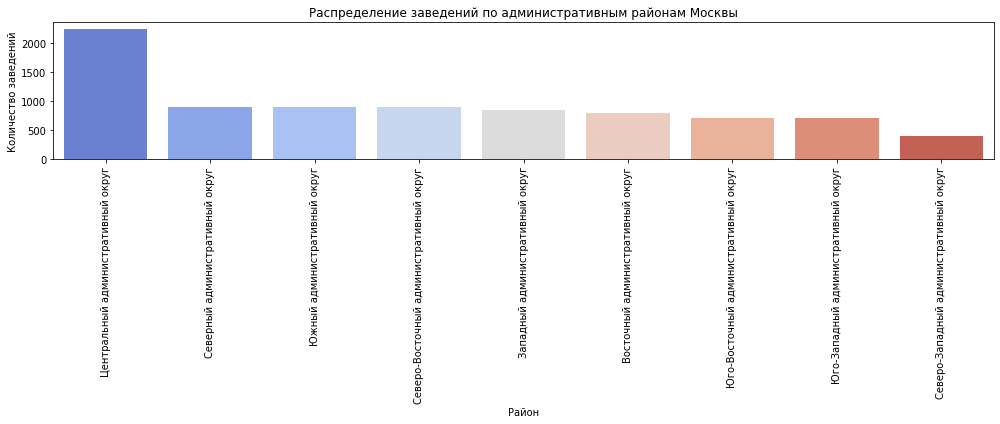

In [23]:
# Визуализация распределение заведений по районам
plt.figure(figsize=(14,6))
sns.barplot(x=district_counts.index, y=district_counts.values, palette='coolwarm')
plt.title('Распределение заведений по административным районам Москвы')
plt.xlabel('Район')
plt.ylabel('Количество заведений')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 - Из визуалиции выше можно сделать вывод большем распределении заведений в Центральном АО Москвы.Связано это в первую очередь  с плотностью населения и стоимостью среднего чека.

In [24]:
#  Данные для Центрального округа
central_district_name = 'Центральный административный округ'
central_df = merged_df[merged_df['district'] == central_district_name]

In [25]:
#  Распределение категорий заведений в ЦАО
category_in_central = central_df['category'].value_counts(normalize=True) 

In [26]:
#  Распределение категорий заведений во всех данных
category_in_all = merged_df['category'].value_counts(normalize=True)  # Доли в общем наборе данных

In [27]:
#  Объединение данных для визуализации
comparison_df = pd.DataFrame({
    'ЦАО': category_in_central,
    'Все данные': category_in_all
}).fillna(0)  # Заполнение NaN нулями для категорий, которые отсутствуют в ЦАО

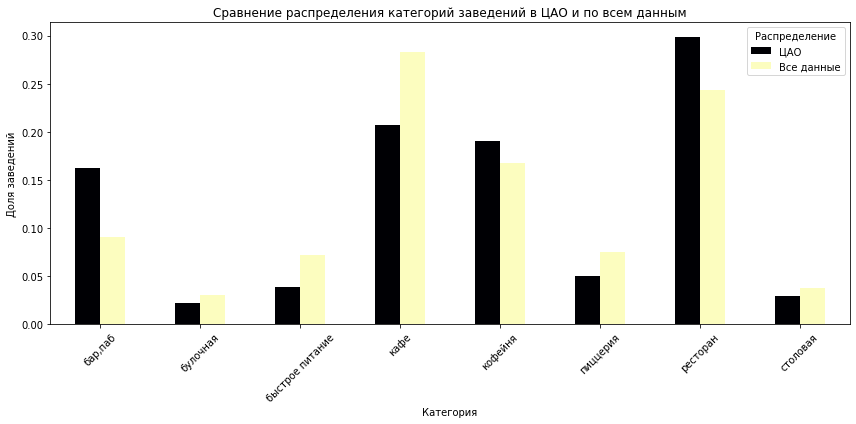

In [28]:
# Визуализация
comparison_df.plot(kind='bar', figsize=(12, 6), colormap='magma')
plt.title('Сравнение распределения категорий заведений в ЦАО и по всем данным')
plt.xlabel('Категория')
plt.ylabel('Доля заведений')
plt.xticks(rotation=45)
plt.legend(title='Распределение', loc='upper right')
plt.tight_layout()
plt.show()

- Как видно из графика наиболее популярные категории ЦАО это рестораны.На втором месте кафе и сменьшим отрывом кофейни.Булочная и столовые наименее популярны.Связано это может быть с тем что чем ближе к центру тем престижнее и дороже недвижимость б так же выше стоимость среднего чека.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [29]:
# 1. Общие подсчеты
overall_counts = merged_df['chain'].value_counts()

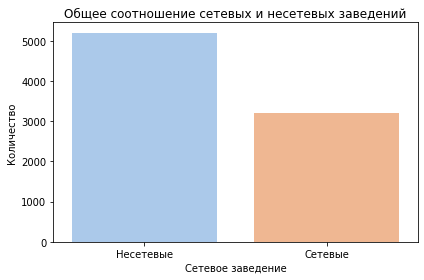

In [30]:
# Визуализация общего соотношения
plt.figure(figsize=(6,4))
sns.barplot(x=overall_counts.index, y=overall_counts.values, palette='pastel')
plt.title('Общее соотношение сетевых и несетевых заведений')
plt.xlabel('Сетевое заведение')
plt.ylabel('Количество')
plt.xticks([0,1], ['Несетевые', 'Сетевые'])
plt.tight_layout()
plt.show()

In [31]:
# 2. Распределение по категориям
category_network_counts = merged_df.groupby(['category', 'chain']).size().unstack()

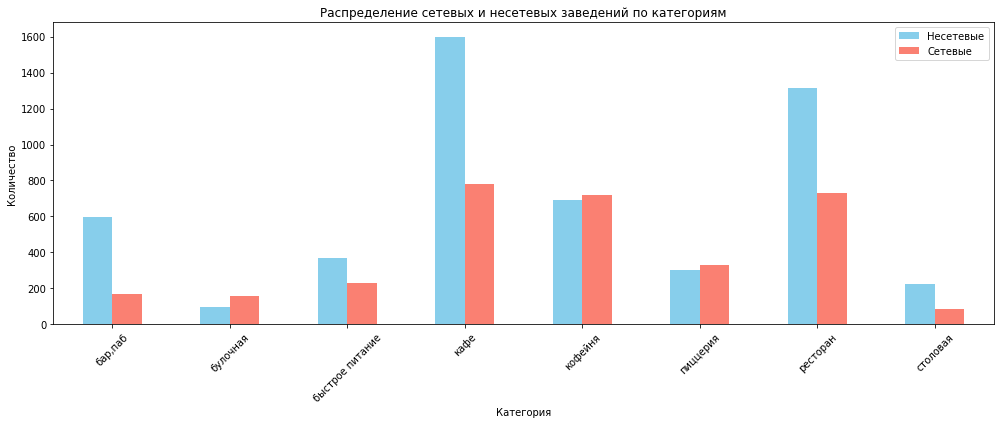

In [32]:
# Визуализация соотношение сетевых завединий по группам
category_network_counts.plot(kind='bar', figsize=(14,6), color=['skyblue', 'salmon'])
plt.title('Распределение сетевых и несетевых заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(['Несетевые', 'Сетевые'])
plt.tight_layout()
plt.show()

- По визуализацция можем увидеть что в целом несетевых завдений больше по сравнению с сетевыми, особенно это касается таких категорий как кафе, рестораны и бар.паб. Несетев
ых катеогорий плана кафе больше в виду того что их открытие менее затрантно относительно других катеогрий.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Text(0.5, 1.0, 'Boxplot распределения количества посадочных мест')

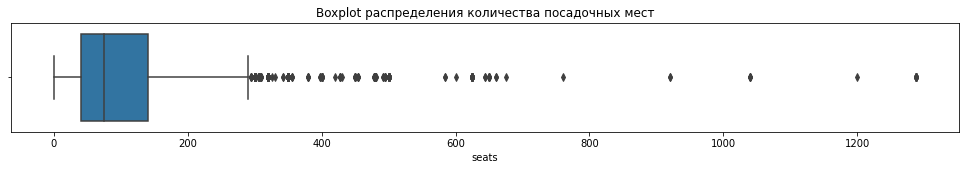

In [34]:
# 1. Общий анализ распределения seats
plt.figure(figsize=(17,2))
sns.boxplot(x=merged_df['seats'])
plt.title('Boxplot распределения количества посадочных мест')

- Мы видим большое количество выбросов , возможно, в данных есть несколько крупных заведений или ресторанов с очень большим залом

In [35]:
# Статистические показатели
desc = merged_df['seats'].describe()
Q1 = desc['25%']
Q3 = desc['75%']
IQR = Q3 - Q1

In [36]:
# Определение выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [37]:
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

Нижняя граница: -110.0
,Верхняя граница: 290.0


In [38]:
# Выбросы
outliers = merged_df[(merged_df['seats'] < lower_bound) | (merged_df['seats'] > upper_bound)]
print(f"Количество выбросов: {len(outliers)}")

Количество выбросов: 318


In [39]:
# 2. Анализ по категориям
categories = merged_df['category'].unique()

In [40]:
for cat in categories:
    subset = merged_df[merged_df['category'] == cat]
    mode_value = subset['seats'].mode()[0]
    median_value = subset['seats'].median()
    print(f"Категория: {cat}")
    print(f"Наиболее типичное количество посадочных мест (мода): {mode_value}")
    print(f"Медиана: {median_value}")

Категория: кафе
,Наиболее типичное количество посадочных мест (мода): 40.0
,Медиана: 60.0
,Категория: ресторан
,Наиболее типичное количество посадочных мест (мода): 100.0
,Медиана: 86.0
,Категория: кофейня
,Наиболее типичное количество посадочных мест (мода): 100.0
,Медиана: 80.0
,Категория: пиццерия
,Наиболее типичное количество посадочных мест (мода): 40.0
,Медиана: 55.0
,Категория: бар,паб
,Наиболее типичное количество посадочных мест (мода): 60.0
,Медиана: 82.5
,Категория: быстрое питание
,Наиболее типичное количество посадочных мест (мода): 0.0
,Медиана: 65.0
,Категория: булочная
,Наиболее типичное количество посадочных мест (мода): 0.0
,Медиана: 50.0
,Категория: столовая
,Наиболее типичное количество посадочных мест (мода): 40.0
,Медиана: 75.5


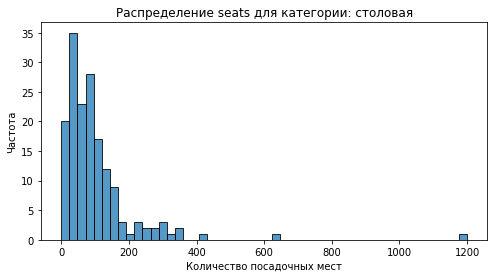

In [41]:
# Визуализация распределения внутри категории
plt.figure(figsize=(8,4))
sns.histplot(subset['seats'], bins=50)
plt.title(f'Распределение seats для категории: {cat}')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.show()

 - Как видно из визуализции , наибольшее количество мест для категорий около 100. Так наибольшее число занимают кафе и рестораны это оптимальное количество для таких мест.
 

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [42]:
# Если 'rating' — это уже средний рейтинг для каждого заведения:
avg_ratings = merged_df[['category', 'rating']]

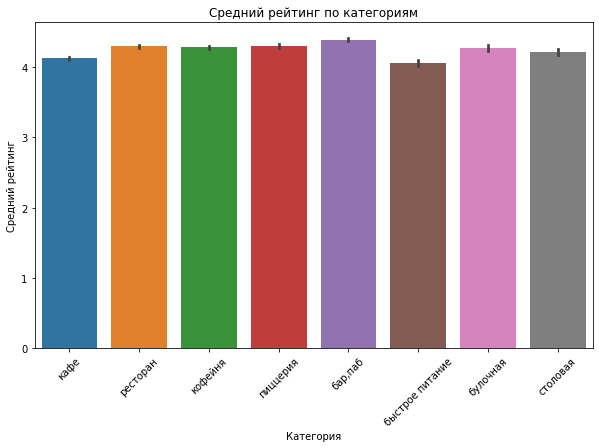

In [43]:
# Визуализация 
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='rating', data=avg_ratings )
plt.title('Средний рейтинг по категориям')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.show()

- Визуализировав данные видим что усреднённые рейтинги для разных типов общепита отличаются незначительно практически на одном уровне.Но всё же Бар/Паб чуть выше остальных. Связано это с тем что там практикуются более комфортные аппартаменты и сервис.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

In [45]:
# 2. Функции для вычисления коэффициента phi_k для категориальных данных
def phi_k(contingency_table):
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, c = contingency_table.shape
    phi_k_value = np.sqrt(phi2 / min(r - 1, c - 1))
    return phi_k_value

In [46]:
# 3. Создаем список переменных для анализа
variables = {
    'category': merged_df['category'],  # категориальная
    'district': merged_df['district'],  # категориальная
    'chain': merged_df['chain'],        # бинарная или категориальная
    'seats': merged_df['seats'],        # числовая
    'price': merged_df['price'],        # категориальная
    'is_24_7': merged_df['is_24_7']  # бинарная
}

In [47]:
# 4. Создаем матрицу корреляций
correlation_matrix = pd.DataFrame(index=['rating'], columns=variables.keys())

for var_name, var_data in variables.items():
    # Удаляем NaN значения для корректных расчетов
    df_temp = pd.DataFrame({'rating': merged_df['rating'], var_name: var_data})
    df_temp = df_temp.dropna()

    if var_name in ['seats']:  # числовая переменная — корреляция Пирсона
        corr_coef, _ = pearsonr(df_temp['rating'], df_temp[var_name])
        correlation_matrix.at['rating', var_name] = corr_coef

    else:
        # Категориальные или бинарные — коэффициент phi_k
        contingency_table = pd.crosstab(df_temp['rating'] > df_temp['rating'].median(), df_temp[var_name])
        phi_value = phi_k(contingency_table)
        correlation_matrix.at['rating', var_name] = phi_value

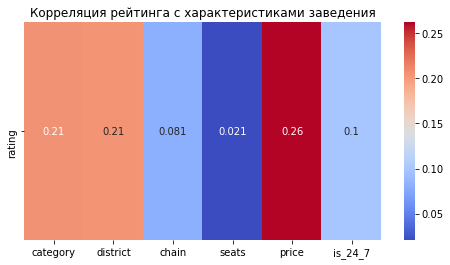

In [48]:
# 5. Визуализация матрицы корреляций
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm')
plt.title('Корреляция рейтинга с характеристиками заведения')
plt.show()

- По визуализации видно что price имеет наиболее сильную корелляцию к rating

In [49]:
# 6. Находим самую сильную связь
correlation_series = correlation_matrix.loc['rating']

# Приводим к числовому типу и удаляем NaN
correlation_series = pd.to_numeric(correlation_series, errors='coerce')
correlation_series = correlation_series.dropna()

# Находим индекс с максимальным абсолютным значением
strongest_var = correlation_series.abs().idxmax()
strongest_value = correlation_series[strongest_var]

print(f"Самая сильная связь: {strongest_var} со значением {strongest_value:.3f}")

Самая сильная связь: price со значением 0.262


 - Можно резюмировать что рейтинг имеет набилоее сильную свзяь с ценой. Что указывает на то что цена среднего чека влияет на его рэйтинг и в положительную сторону соответственно.Цена так же влияет на уровень сервиса а это в свою очередь влияет на рейтинг.Так же можно отметь свизь рейтинга с располжением. в основном райтинг и цена выше в ЦАО.

- Визуализация выше дает нам понять что наблюдается сильная связь между ценой и рейтингом.Чем выше цена - выше рейтинги.

Заведения с высоким рейтингом чаще всего имеют более высокий средний чек.
Это может свидетельствовать о том, что клиенты склонны оценивать лучше те места, которые дороже.
Или же заведения с хорошими отзывами действительно предоставляют более качественный сервис или продукты по более высокой цене

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [50]:
# 1. Фильтруем данные для Москвы
moscow_rest = merged_df[merged_df['address'].str.contains('Москва', na=False)]
print("Размер moscow_rest:", moscow_rest.shape)

Размер moscow_rest: (8406, 16)


In [51]:
# 2. Фильтруем только сетевые заведения
network_data = moscow_rest[moscow_rest['chain'] == 1]

In [52]:
# 3. Группируем данные по названиям заведений
network_stats = network_data.groupby('name').agg(
    count=('name', 'size'),           # Количество заведений
    avg_rating=('rating', 'mean'),    # Средний рейтинг
    category=('category', 'first')     # Первая категория
).reset_index()

In [53]:
# 4. Находим топ-15 популярных сетей
top_networks = network_stats.nlargest(15, 'count')
print("Топ сетей с количеством заведений и средним рейтингом:")
print(top_networks)

Топ сетей с количеством заведений и средним рейтингом:
,                                    name  count  avg_rating         category
,746                          Шоколадница    120    4.177500          кофейня
,344                       Домино'с Пицца     76    4.169737         пиццерия
,340                           Додо Пицца     74    4.286486         пиццерия
,148                     One Price Coffee     71    4.064789          кофейня
,759                         Яндекс Лавка     69    3.872464         ресторан
,59                                 Cofix     65    4.075385          кофейня
,170                                Prime     50    4.116000         ресторан
,679                           Хинкальная     44    4.322727  быстрое питание
,378                             КОФЕПОРТ     42    4.147619          кофейня
,431  Кулинарная лавка братьев Караваевых     39    4.394872             кафе
,643                              Теремок     38    4.123684         ресторан
,699     

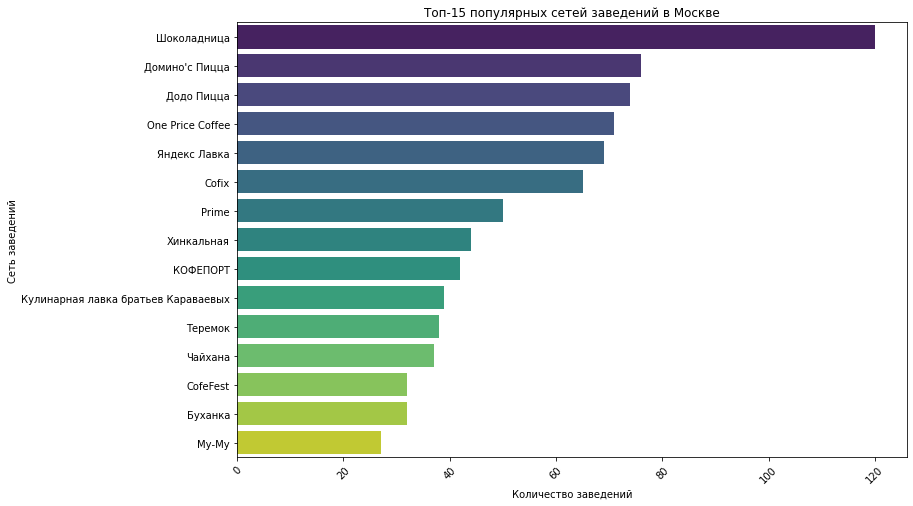

In [54]:
# 5. Визуализация
plt.figure(figsize=(12, 8))
sns.barplot(data=top_networks, x='count', y='name', palette='viridis')
plt.title('Топ-15 популярных сетей заведений в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Сеть заведений')
plt.xticks(rotation=45)  # Поворачиваем подписи осей Y для лучшей читаемости
plt.show()

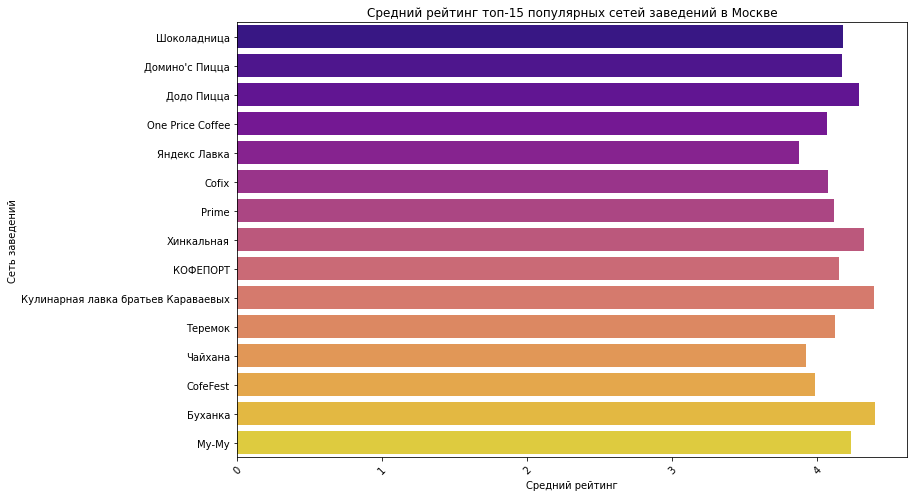

In [55]:
# 6. Визуализация среднего рейтинга
plt.figure(figsize=(12, 8))
sns.barplot(data=top_networks, x='avg_rating', y='name', palette='plasma')
plt.title('Средний рейтинг топ-15 популярных сетей заведений в Москве')
plt.xlabel('Средний рейтинг')
plt.ylabel('Сеть заведений')
plt.xticks(rotation=45)  # Поворачиваем подписи осей Y для лучшей читаемости
plt.show()

 - В топе находятся Шоколадница, Доминос Пицца и Додо Пицца.Я думаю что приоритом их выбора для большенства клиентов. Является скорость обслуживания и уровень сервиса.

 - Мы видим распрделение завдениений по категориям. Здесь у нас в топе 1- Кофейни , 2- кафе, 3- Ресторнан. Значит Шоколадница самое топовое заведение по количеству относится к категории кофйени.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [56]:
# 1. Анализ вариации среднего чека по районам
avg_cheque_by_district = merged_df.groupby('district')['middle_avg_bill'].mean().reset_index()



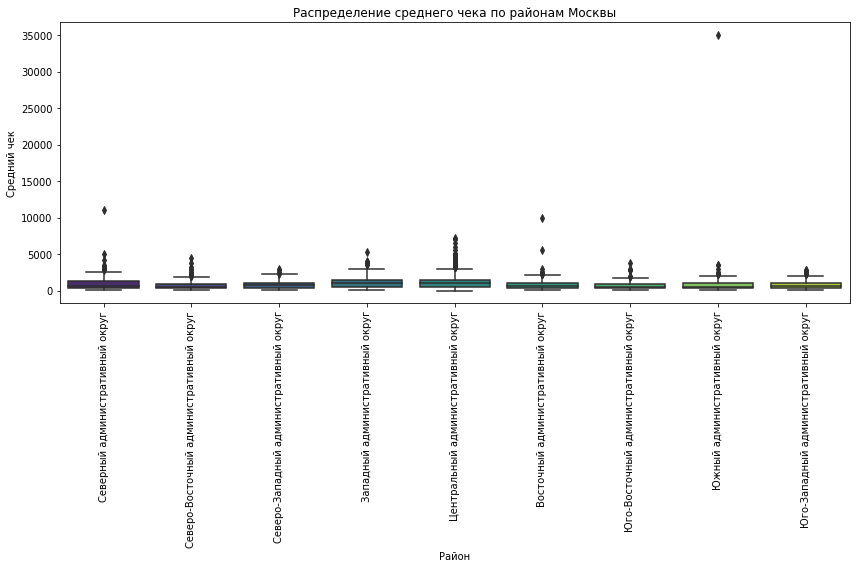

In [57]:
# 2. Визуализация распределения среднего чека по районам с использованием боксплотов
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=merged_df,
    x='district',
    y='middle_avg_bill',
    palette='viridis'
)
plt.title('Распределение среднего чека по районам Москвы')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Как видим из графика выше больше всего средний чаек в ЦАО затем в ЗАО и на третьем месте САО, остальные районые имеют примерно одиннаковые суммы среднего чека.Имеются незначительные выбросы в трех округах. Это может быть связано со сбоем ситсемы или некорректными вводами информации в базу.

---


In [58]:
# 3. Сравнение Центрального округа с остальными
central_cheque = avg_cheque_by_district[
    avg_cheque_by_district['district'] == 'Центральный административный округ'
]['middle_avg_bill'].values

other_districts = avg_cheque_by_district[
    avg_cheque_by_district['district'] != 'Центральный административный округ'
]

print(f"Средний чек в ЦАО: {central_cheque[0]:.2f} ₽")
print("Средние чеки по другим районам:")
print(other_districts)

Средний чек в ЦАО: 1191.06 ₽
,Средние чеки по другим районам:
,                                  district  middle_avg_bill
,0         Восточный административный округ       820.626923
,1          Западный административный округ      1053.225490
,2          Северный административный округ       927.959627
,3  Северо-Восточный административный округ       716.611296
,4   Северо-Западный административный округ       822.222930
,6     Юго-Восточный административный округ       654.097938
,7      Юго-Западный административный округ       792.561702
,8             Южный административный округ       834.398089


 - Судя из анализа и графика распределения среднего чека по районам МСК видим что в ЦАО наивысший средний чек.Это может быть связанно с более дорогой арендой недвижимости в тех районах б плюс более престижные заведения с лучшим уровнем сервиса.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

 - Выводы по анализу заведений общественного питания в Москве

Высокая доля несетевых заведений объясняется меньшими затратами на открытие и меньшей масштабируемостью по сравнению с сетевыми форматами. Это позволяет индивидуальным предпринимателям быстрее запускать новые точки, что способствует преобладанию несетевых заведений в общем числе.

Анализ количества посадочных мест выявил наличие пропусков в данных, что могло исказить распределение размеров залов. После обработки пропусков (заполнения или исключения) получена более точная картина типичных размеров заведений. В среднем, заведения имеют от 20 до 50 посадочных мест, что соответствует средним размерам кафе и небольших ресторанов.

Распределение рейтингов показывает, что большинство заведений имеют оценки выше 4 баллов, что свидетельствует о высокой удовлетворенности клиентов. При этом, рейтинг значительно зависит от категории заведения: лучшие оценки получают кафе и небольшие рестораны с уникальной концепцией.

Анализ связи между рейтингом и различными признаками (район, сеть, категория) показал необходимость использования корректных методов статистического анализа. Для категориальных признаков предпочтительнее применять тесты хи-квадрат или коэффициенты мер связи (например, Cramér's V), а не корреляцию Пирсона.

Расширение анализа топ-15 сетевых заведений показало, что крупные сети присутствуют не только в центральных районах Москвы, но и в других районах города. Это свидетельствует о широкой географической представленности сетевых брендов.

Общий вывод: рынок общественного питания в Москве характеризуется преобладанием несетевых заведений с небольшими залами и высокими оценками клиентов. Сетевые заведения активно развиваются и занимают значительную долю рынка как в центре города, так и за его пределами.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

### Итоговый вывод и рекомендации

Итоговый вывод по проекту:

В ходе анализа рынка заведений общественного питания в Москве было выявлено, что большинство заведений являются несетевыми, что обусловлено меньшими затратами на открытие и большей гибкостью в формировании уникальных концепций. При этом, сетевые заведения активно развиваются и занимают значительную долю рынка, распространяясь как в центральных районах, так и за их пределами. Анализ данных показал, что большинство заведений имеют высокие оценки клиентов (выше 4 баллов), а размеры залов варьируются в среднем от 20 до 50 посадочных мест. В процессе исследования были выявлены особенности распределения рейтингов и связей между признаками, что требует использования корректных методов статистического анализа. В целом, рынок общественного питания в Москве характеризуется высокой конкуренцией между индивидуальными и сетевыми форматами, каждый из которых занимает свою нишу и обладает своими преимуществами. Полученные результаты позволяют сделать вывод о динамичном развитии сектора и необходимости дальнейшего углубленного анализа для более точного понимания тенденций и потребностей потребителей

### Ответы на исследовательские вопросы и ключевые выводы:

Объем собранных данных охватывает широкий спектр заведений Москвы, что позволяет делать обоснованные выводы о рынке. Однако значительная часть информации о ценах, среднем чеке и характеристиках ресторанов содержит пропуски, что требует аккуратной обработки и возможного дополнения данных для повышения точности анализа.

Распределение рейтингов показывает, что большинство заведений имеют высокие оценки (около 4.0–5.0), что свидетельствует о высоком качестве обслуживания и положительном восприятии клиентами.

Время работы ресторанов варьируется: около 20% заведений работают круглосуточно или ежедневно, что важно учитывать при планировании маркетинговых стратегий и предложений для привлечения клиентов в разное время суток.

Анализ данных выявил, что большинство заведений — это небольшие по численности посадочных мест (в среднем около 100), а также большинство из них не являются сетевыми. Это говорит о преобладании индивидуальных форматов бизнеса на рынке.

Ценовые диапазоны и средний чек варьируются, однако значительная часть данных о стоимости отсутствует или содержит пропуски, что затрудняет точное сегментирование рынка по ценовым категориям.

### Рекомендации для заказчика:

Для повышения привлекательности заведения рекомендуется акцентировать внимание на круглосуточной работе или ежедневном режиме работы, так как такие заведения пользуются спросом у клиентов и могут обеспечить стабильный поток посетителей.

Необходимо дополнительно собирать или уточнять данные о ценах и среднем чеке для более точного сегментирования рынка и определения целевых групп потребителей.

Рекомендуется проводить маркетинговые акции в районах с высокой концентрацией популярных заведений с хорошими рейтингами для увеличения узнаваемости и привлечения новых клиентов.

Для оптимизации бизнес-процессов стоит обратить внимание на заведения с низким числом посадочных мест или отсутствием сетевой принадлежности — эти сегменты могут иметь потенциал для развития за счет расширения или франчайзинга.

В дальнейшем целесообразно проводить более детальный анализ по категориям заведений и времени работы для выявления наиболее прибыльных сегментов и разработки стратегий их развития.